# Regresión Robotnik

Ejercicio inspirado en Reggie's Linear Regression de Codecademy (2022) y referencias a películas y videojuegos.

El Dr. Robotnik ha sido contratado para capturar a un erizo azúl que está provocando fluctuaciones eléctricas en un pueblo lejano de Norteamérica. Al verse frente a frente, Robotnik se mostró fascinado por la criatura y decidió capturarla para sus experimentos. Desafortunadamente, el erizo demostró poseer una velocidad nunca antes registrada por un organismo vivo en la Tierra, además de la capacidad de liberar una gran cantidad de energía a medida que incrementaba su velocidad.

Después de observar cómo el erizo destruía uno a uno los robots con los que pretendía capturarle, Robotnik regresa a su laboratorio para diseñar un dispositivo que pueda soportar la fuerza de choque del erizo. Para ello, necesitará modelar la relación entre la velocidad y la cantidad de energía liberada por el erizo a través de una regresión lineal utilizando los datos recolectados durante su encuentro.

Una _regresión lineal_ se basa en un grupo de puntos sobre una gráfica en donde se desea encontrar una línea que se aproxime a estos puntos minimizando el _error_ o la distancia de cada punto hacia la línea.

El objetivo de este taller es utilizar ciclos, listas, operaciones aritméticas y funciones para crear una función que encuentre la línea de mejor ajuste para una serie de datos dados (en este caso, la velocidad y energía liberada por el erizo).

## Parte 1: Cálculo del Error

La línea que deseamos encontrar es de la forma:

$$y = mx + b$$

donde $m$ es la pendiente de la línea y $b$ el intercepto donde la línea se cruza con el eje $y$.

Crea una función llamada `get_y()` que reciba como parámetros `m`, `b` y `x` y retorne el valor de `y` para esa `x`.

In [ ]:
def get_y(m,b,x):
  return m*x+b

Robotnik quiere probar muchos valores de `m` y `b` para determinar cuál produce la línea con el menor error.

Para calcular el error entre un punto y una línea, requiere una función llamada `calculate_error()`, que toma `m`, `b` y un punto llamado `point` que es una pareja de valores `(x, y)` (la velocidad y la energía medidas por los drones). La función debe retornar la distancia entre la línea y el punto.  

Para encontrar esta distancia, considere lo siguiente:
1. Obtenga el valor de $x$ del punto y almacénelo en una variable llamada `x_point`.
2. Obtenga el valor de $y$ del punto y almacénelo en una variable llamada `y_point`.
3. Utilice la función `get_y()` para obtener el valor de $y$ calculado con el valor de `x_point`.
4. Calcule la diferencia entre la $y$ calculada con la función `get_y()` y `y_point`
5. Retorne el valor absoluto de la distancia (puede usar la función `abs()` para hacer esto).

In [33]:
# Función calculate_error(m, b, point)
import numpy as np
def calculate_error(m,b,point):
  x_point, y_point = point
  y = m*x_point + b
  distance = abs(y - y_point)
  return distance

Probemos la función:

In [34]:
#En esta línea, y = x, así que el punto (3, 3) debería estar sobre la línea. El error debe ser cero (0):
print(calculate_error(1, 0, (3, 3)))

#El punto (3, 4) debería estar a 1 unidad de distancia de la línea y = x:
print(calculate_error(1, 0, (3, 4)))

#El punto (3, 3) debería estar a 1 unidad de distancia de la línea y = x - 1:
print(calculate_error(1, -1, (3, 3)))

#El punto (3, 3) debería estar a 5 unidades de distancia de la línea y = -x + 1:
print(calculate_error(-1, 1, (3, 3)))

0
1
1
5


Los datos de velocidad y energía recolectados por los drones de Robotnik han sido almacenados en una lista llamada `datapoints`:

In [18]:
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]


El primer registro, `(1, 2)`, significa que el erizo produjo una cantidad de energía de $2 GJ$ ($1 GJ = 277.8 kWh$) a una velocidad de $1 m/s$. A una velocidad de $4 m/s$ produjo $4 GJ$.

A medida que buscamos una línea que se ajuste a estos datos, necesitaremos una función llamada `calculate_all_error`, que toma la `m` y la `b` que describe una línea, y un conjunto de datos `datapoints`.

La función `calculate_all_error` debería iterar a través de cada `point`en `points` y calcular el error de ese punto hacia la línea (usando `calculate_error`). La función debe mantener un acumulador del error total, y luego retornar este valor al terminar de evaluar todos los puntos.

In [41]:
def calculate_all_error(m, b, points):
    total_error = 0
    for point in datapoints:
        point_error = calculate_error(m, b, point)
        total_error += point_error
    return total_error

Probemos la función:

In [42]:
#Cada punto en este conjunto se encuentra sobre la línea y=x, por lo que el error total debería ser cero (0):
test_datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, 0, test_datapoints))

#Cada punto en este conjunto está a 1 unidad de distancia de y = x + 1, por lo que el error total debería ser de cuatro (4):
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, 1, test_datapoints))

#Cada punto en este conjunto está a 1 unidad de distancia de y = x - 1, por lo que el error total debería ser de cuatro (4):
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, -1, test_datapoints))

#Los puntos en este conjunto están a 1, 5, 9, y 3 unidades de distancia de y = -x + 1, respectivamente,
#por lo que el error total debería ser de 1 + 5 + 9 + 3 = 18
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(-1, 1, test_datapoints))

0
4
4
18


Robotnik parece satisfecho. Parece que ya tenemos una función que toma una línea y los datos de los drones, y retornar qué tanto error se produce cuando tratamos de encajar la línea con los datos.

El siguiente paso es encontrar la `m` y la `b` que minimiza este error, y así, la que mejor se ajusta a los datos.

## Parte 2: Probando pendientes e interceptos

Robotnik considera que la mejor forma de encontrar la línea que mejor se ajusta a los datos es a punta de ensayo y error. Para esto, se debe probar muchas pendientes diferentes (valores de `m`) y muchos interceptos diferentes (valores de `b`), y ver cuál de ellos produce el error más pequeño para los registros de los drones.

Usando list comprehension, crea una lista de los posibles `m` a probar. Haz que la lisa `possible_ms` vaya de -10 a 10 (inclusiva) en incrementos de 0.1.

Pista: (para ver la pista, haz doble clic en la celda para ver el texto oculto)
<span style="visibility: hidden;">
  puedes atravesar los valores en range(-100, 101) y multiplicar cada uno por 0.1
</span>

In [47]:
possible_ms = np.arange(-10,10,0.1)


Ahora, crea una lista de los posibles `b` (`possible_bs`) entre -20 y 20 (inclusivo), en pasos de 0.1:

In [54]:
possible_bs = np.arange(-20,20,0.1)

Para encontrar el error más pequeño, primero tenemos que crear todas las líneas posibles (`y = mx + b`) a partir de todas las `m` y las `b` posibles (`possible_ms` y `possible_bs`). Después, tenemos que evaluar qué línea produce el menor error total con el conjunto de datos de los registros de los drones (`datapoints`)

Para esto:
1. Crea las variables que estaremos optimizando:
    * `smallest_error` - debería comenzar en el infinito (`float("inf")`) tal que cualquier error que obtengamos inicialmente sea más pequeño que `smallest_error`.
    * `best_m` - puede comenzar en cero (0).
    * `best_b` - puede comenzar en cero (0).
2. Itera a través de cada elemento `m` en `possible_ms`.
3. Para cada valor de `m`, toma cada valor de `b` en `possible_bs`.
4. Si el valor retornado de la función `calculate_all_error` para un valor de `m`, `b` y los `datapoints` es menor que el `smallest_error` actual, cambia los valores de `best_m`, `best_b` y `smallest_error`.

Al finalizar los ciclos anidados, la variable `smallest_error` debería tener el menor error encontrado, y `best_m` y `best_b` deberían ser los valores que producen el menor error.

In [56]:
# Calcular smallest_error, best_m y best_b
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]
smallest_error = float("inf")
best_m = 0
best_b = 0
for m in possible_ms:
  for b in possible_ms:
    current_error = calculate_all_error(m,b,datapoints)
    if current_error < smallest_error:
      best_m = round(m,2)
      best_b = round(b,2)
      smallest_error = round(current_error,2)

print(f"Best m:{best_m}\nBest b: {best_b}\nSmallest error: {smallest_error}")

Best m:0.3
Best b: 1.7
Smallest error: 5.0


## Parte 3: Predicciones del Modelo

Utilizando los valores de `m` y `b` arrojados por nuestro algoritmo para encontrar la línea de mejor ajuste a los datos recopilados por los drones, grafica la línea energía-velocidad, así como los datos de velocidad y energía recolectados por los drones de Robotnik.

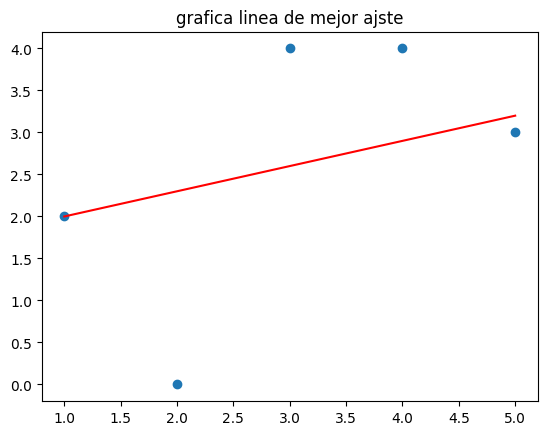

In [60]:
# Gráfica de la línea de mejor ajuste
import matplotlib.pyplot as plt
import numpy as np
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]
x = [point[0] for point in datapoints]
y = [point[1] for point in datapoints]

m = best_m
b = best_b
x_line = np.linspace(min(x), max(x), 100)
y_line = m * x_line + b

plt.scatter(x, y)
plt.plot(x_line, y_line, color='red')

plt.title('grafica linea de mejor ajste')

plt.show()

Actividad desarrollada por Esteban Ruiz (esteban.ruizm@upb.edu.co)